### Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import json 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import datetime as dt 
import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio
import warnings 
warnings.filterwarnings('ignore')
import requests
import glob
import xlrd

### Loading DataSets

In [2]:
# data1 = pd.read_csv(r"C:\Users\Akshay\OneDrive\Desktop\GUVI_Projects\capstone(6)_singapur\ResaleFlatPricesBasedonApprovalDate19901999.csv")
# data2= pd.read_csv(r"C:\Users\Akshay\OneDrive\Desktop\GUVI_Projects\capstone(6)_singapur\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
data3= pd.read_csv(r"C:\Users\Akshay\OneDrive\Desktop\GUVI_Projects\capstone(6)_singapur\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
data4= pd.read_csv(r"C:\Users\Akshay\OneDrive\Desktop\GUVI_Projects\capstone(6)_singapur\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
data5= pd.read_csv(r"C:\Users\Akshay\OneDrive\Desktop\GUVI_Projects\capstone(6)_singapur\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

### Combining DataSets

In [3]:
#Combining tha multi dataframe into one dataset
df = pd.concat([ data3, data4, data5],ignore_index=True)


### Understanding the Data

In [4]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
267044,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67 years 03 months
267045,2024-04,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,780888.0,63 years 03 months
267046,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63 years 04 months
267047,2024-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,880000.0,63 years 04 months


In [5]:
df.shape

(267049, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267049 entries, 0 to 267048
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                267049 non-null  object 
 1   town                 267049 non-null  object 
 2   flat_type            267049 non-null  object 
 3   block                267049 non-null  object 
 4   street_name          267049 non-null  object 
 5   storey_range         267049 non-null  object 
 6   floor_area_sqm       267049 non-null  float64
 7   flat_model           267049 non-null  object 
 8   lease_commence_date  267049 non-null  int64  
 9   resale_price         267049 non-null  float64
 10  remaining_lease      214846 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 22.4+ MB


In [7]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,267049.000000,267049.000000,2.670490e+05
mean,96.971527,1994.013829,4.808199e+05
std,24.238863,13.231459,1.600504e+05
min,31.000000,1966.000000,1.400000e+05
25%,76.000000,1984.000000,3.650000e+05
50%,94.000000,1993.000000,4.500000e+05
75%,112.000000,2003.000000,5.650000e+05
max,280.000000,2022.000000,1.568888e+06


In [8]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

### Data Cleaning & Data Pre-Processing

In [9]:
df.nunique()

month                   146
town                     26
flat_type                 7
block                  2707
street_name             568
storey_range             25
floor_area_sqm          177
flat_model               21
lease_commence_date      56
resale_price           4512
remaining_lease         724
dtype: int64

In [10]:
df.isna().sum()

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease        52203
dtype: int64

#### Cleaning the "remining_lease" Column

In [11]:
# converting  strings representing durations in years into a numerical value representing the same duration in years.
def convert_to_years(row):
    if pd.notna(row) and isinstance(row,str):
        if 'years' in row:
            parts=row.split()
            years=float(parts[0])
            months=float(parts[2]) if len(parts) > 2 else 0
            return years + months/ 12
        
    return row

In [12]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [13]:
# filling the null values in remaining_lease with mode because null values more than 25% it will affect accuracy 
#The mode is a statistical measure that represents the most frequently occurring value (or values) in a dataset.
#It's one of the central tendencies alongside the mean (average) and median.
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,68.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,68.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,68.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,68.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,68.0


In [14]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    54794
95.000000     2362
67.000000     2209
69.000000     1911
71.000000     1759
             ...  
41.750000        1
96.833333        1
97.583333        1
97.250000        1
97.750000        1
Name: count, Length: 671, dtype: int64

In [15]:
#Checking NULL Values in the dataset
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

### Datatype Conversion

In [16]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [17]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,68.000000
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,68.000000
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,68.000000
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,68.000000
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,68.000000
...,...,...,...,...,...,...,...,...,...,...,...
267044,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67.250000
267045,2024-04,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,780888.0,63.250000
267046,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63.333333
267047,2024-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,880000.0,63.333333


#### Cleaning the "month" Column

In [18]:
#month column
#seperate the year and month of resale because this is time series data

df[['resale_year','resale_month']]=df['month'].str.split('-',expand=True)


In [19]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,68.0,2012,03
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,68.0,2012,03


In [20]:
#drop the resale month column 
df.drop('month',axis=1,inplace=True)

In [21]:
df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,68.0,2012,03
1,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,68.0,2012,03


#### Cleaning the storey_range Column

In [22]:
#split the 'storey_range' column into upper_bound and lower_bound

df[['storey_lower_bound','storey_upper_bound']]=df['storey_range'].str.split("TO",expand=True)

df['storey_lower_bound']=pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound']=pd.to_numeric(df['storey_upper_bound'])

In [23]:
df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,68.0,2012,03,6,10
1,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,68.0,2012,03,1,5


In [24]:
#droping storey_range column
df.drop('storey_range',axis=1,inplace=True)

In [25]:
df.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,45.0,Improved,1986,250000.0,68.0,2012,03,6,10
1,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,44.0,Improved,1980,265000.0,68.0,2012,03,1,5


#### Cleaning the "block" column

In [26]:
df["block"].dtype

dtype('O')

In [27]:
#converting the block column datatype from object to float value
df["block"]=pd.to_numeric(df['block'],errors='coerce')

In [28]:
df["block"].isnull().sum()

79294

In [29]:
df["block"]=df["block"].fillna(df['block'].mode()[0])

In [30]:
df["block"].isnull().sum()

0

In [183]:
#The errors='coerce' parameter in the pd.to_numeric() function is used to instruct pandas to convert 
#any values that cannot be parsed as numbers into NaN (Not a Number) values, rather than raising an error.
#errors='coerce' is a convenient way to handle data that may contain invalid or unexpected values when converting it to numeric type, by replacing such values with NaNs.

#### Cleaning "resale_year" Column

In [31]:
df['resale_year'].dtypes

dtype('O')

In [32]:
#Converting the resale_year column datatype from object to int.
df["resale_year"]=pd.to_numeric(df['resale_year'],errors='coerce')

In [33]:
df['resale_year'].dtypes

dtype('int64')

#### Cleaning "resale_month" column

In [34]:
df['resale_month'].dtypes

dtype('O')

In [35]:
df["resale_month"]=pd.to_numeric(df['resale_month'],errors='coerce')

In [36]:
df['resale_month'].dtypes

dtype('int64')

In [37]:
df.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,2 ROOM,172.0,ANG MO KIO AVE 4,45.0,Improved,1986,250000.0,68.0,2012,3,6,10
1,ANG MO KIO,2 ROOM,510.0,ANG MO KIO AVE 8,44.0,Improved,1980,265000.0,68.0,2012,3,1,5


In [38]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

### Text errors in Object dtype columns

In [39]:
object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [40]:
df['town'].value_counts()

town
SENGKANG           20471
WOODLANDS          19691
JURONG WEST        19035
TAMPINES           18353
YISHUN             17944
PUNGGOL            16205
BEDOK              15311
HOUGANG            13521
CHOA CHU KANG      11914
ANG MO KIO         11729
BUKIT BATOK        10358
BUKIT MERAH        10328
BUKIT PANJANG       9698
TOA PAYOH           8376
PASIR RIS           8256
KALLANG/WHAMPOA     7996
QUEENSTOWN          7354
SEMBAWANG           7071
GEYLANG             6896
CLEMENTI            6245
JURONG EAST         5707
SERANGOON           5214
BISHAN              4850
CENTRAL AREA        2168
MARINE PARADE       1721
BUKIT TIMAH          637
Name: count, dtype: int64

In [41]:
df['flat_type'].value_counts()

flat_type
4 ROOM              110290
3 ROOM               67382
5 ROOM               64840
EXECUTIVE            20253
2 ROOM                4059
1 ROOM                 121
MULTI-GENERATION       104
Name: count, dtype: int64

In [42]:

df['street_name'].value_counts()

street_name
YISHUN RING RD        4183
BEDOK RESERVOIR RD    3114
ANG MO KIO AVE 10     2844
ANG MO KIO AVE 3      2560
PUNGGOL FIELD         2411
                      ... 
WOODLANDS CTR RD         4
GEYLANG EAST AVE 2       2
MARINE PARADE CTRL       2
MARGARET DR              2
ALJUNIED AVE 2           1
Name: count, Length: 568, dtype: int64

In [43]:
df['flat_model'].value_counts()

flat_model
Model A                   87322
Improved                  67035
New Generation            38023
Premium Apartment         28170
Simplified                11812
Apartment                 10194
Standard                   8191
Maisonette                 7525
Model A2                   3412
DBSS                       3269
Model A-Maisonette          463
Adjoined flat               445
Type S1                     434
Type S2                     216
Terrace                     153
Premium Apartment Loft      108
Multi Generation            104
2-room                       90
Improved-Maisonette          35
3Gen                         28
Premium Maisonette           20
Name: count, dtype: int64

In [44]:
df['flat_model'].nunique()

21

In [45]:
df['flat_model']=df['flat_model'].replace({'MODEL A':'model A',
                                           'NEW GENERATION':'New Generation',
                                           'IMPROVED':'Improved',
                                           'PREMIUM APARTMENT':'Premium Apartment',
                                           'MULTI GENERATION':'Multi Generation',
                                           '2-ROOM':'2-room',
                                           'SIMPLIFIED':'Simplified',
                                           'STANDARD':'Standard',
                                           'MAISONETTE':'Maisonette',
                                           'MULTI GENERATION':'Multi Generation',
                                           'APARTMENT':'Apartment',
                                           'MODEL A-MAISONETTE':'Model A-Maisonette',
                                           'TERRACE':'Terrace',
                                           'IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [46]:
df['flat_model'].value_counts()

flat_model
Model A                   87322
Improved                  67035
New Generation            38023
Premium Apartment         28170
Simplified                11812
Apartment                 10194
Standard                   8191
Maisonette                 7525
Model A2                   3412
DBSS                       3269
Model A-Maisonette          463
Adjoined flat               445
Type S1                     434
Type S2                     216
Terrace                     153
Premium Apartment Loft      108
Multi Generation            104
2-room                       90
Improved-Maisonette          35
3Gen                         28
Premium Maisonette           20
Name: count, dtype: int64

In [47]:
df['flat_model'].nunique()

21

###  Finding Duplicates in the Data set

In [48]:
#Counting the total number of Duplicates prestent in the dataset
df.duplicated().sum()

812

In [49]:
#Droping the Duplicates
df.drop_duplicates(inplace=True)

In [50]:
df.duplicated().sum()

0

###  Detecting the Outliers in the Data

In [51]:
float_data_columns=[var for var in df.columns if df[var].dtype=='float64']
float_data_columns

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [52]:
integer_data_columns=[var for var in df.columns if df[var].dtype=='int64']
integer_data_columns

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

### Using Boxplot for Outlier Detection

##### Outlier detection in block column

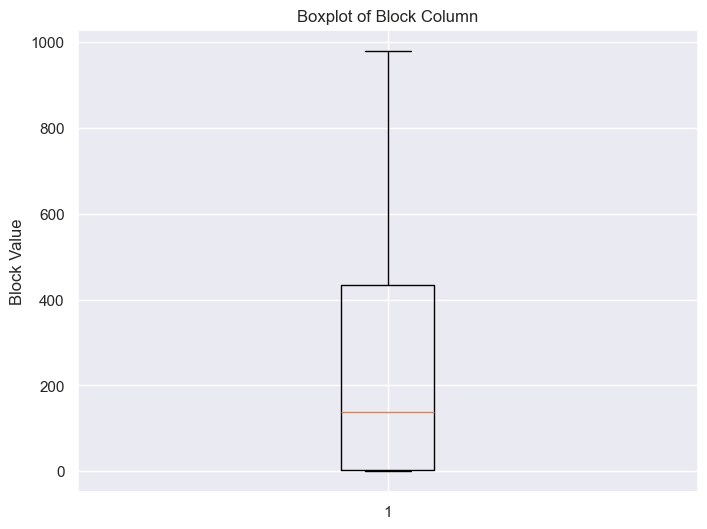

In [53]:
#creating plot for block column
import matplotlib.pyplot as plt

# Create a boxplot for 'block'
plt.figure(figsize=(8, 6))
plt.boxplot(df['block'])
plt.title('Boxplot of Block Column')
plt.ylabel('Block Value')
plt.grid(True)
plt.show()


In [54]:
# Calculate quartiles and IQR(Inter Quartile Range)
Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the 'block' column to the calculated bounds
df['block'] = df['block'].clip(lower=lower_bound, upper=upper_bound)
print(lower_bound,upper_bound)
# Now, if you want to see the lowest and highest values in the clipped 'block' column:
lowest_value = df['block'].min()
highest_value = df['block'].max()

print("Lowest value in 'block' column after clipping:", lowest_value)
print("Highest value in 'block' column after clipping:", highest_value)


-646.0 1082.0
Lowest value in 'block' column after clipping: 1.0
Highest value in 'block' column after clipping: 980.0


In [206]:
"""The clip() function in pandas is used to limit the values in a DataFrame or Series to be within a specified range.
It takes two parameters: lower and upper, which represent the lower and upper bounds, respectively.
Any value in the DataFrame or Series that falls outside this range is replaced with the corresponding bound."""

'The clip() function in pandas is used to limit the values in a DataFrame or Series to be within a specified range.\nIt takes two parameters: lower and upper, which represent the lower and upper bounds, respectively.\nAny value in the DataFrame or Series that falls outside this range is replaced with the corresponding bound.'

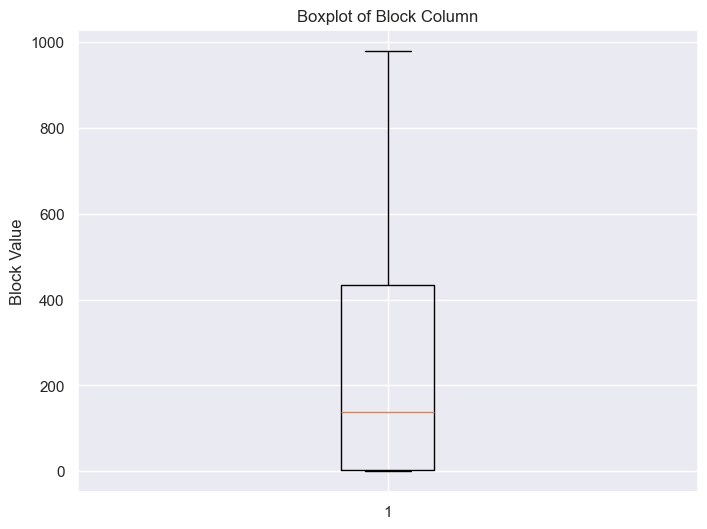

In [55]:
import matplotlib.pyplot as plt

# Create a boxplot for 'block'
plt.figure(figsize=(8, 6))
plt.boxplot(df['block'])
plt.title('Boxplot of Block Column')
plt.ylabel('Block Value')
plt.grid(True)
plt.show()


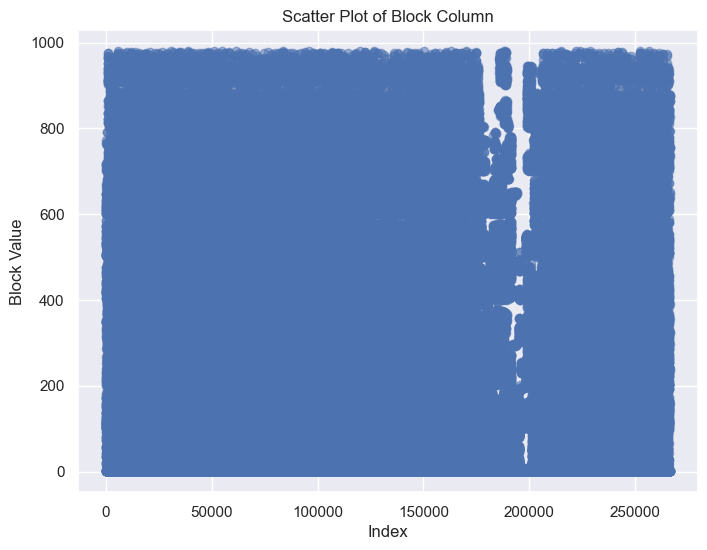

In [56]:
import matplotlib.pyplot as plt

# Create a scatter plot for 'block'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['block'])), df['block'], alpha=0.5)
plt.title('Scatter Plot of Block Column')
plt.xlabel('Index')
plt.ylabel('Block Value')
plt.grid(True)
plt.show()


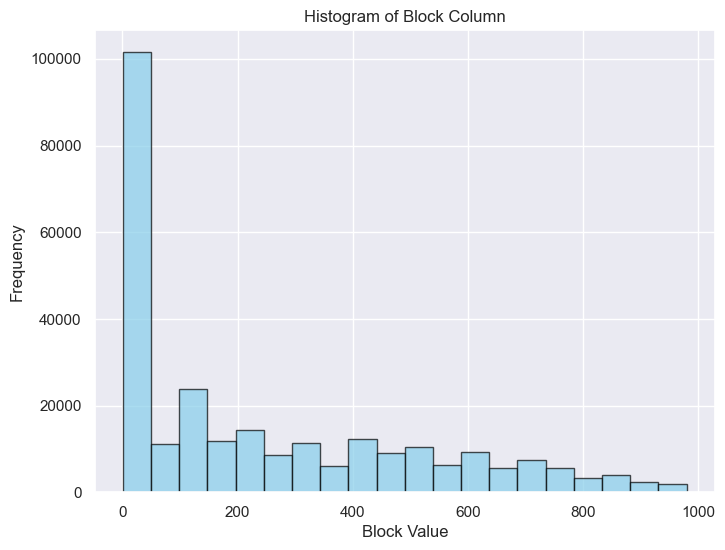

In [57]:
import matplotlib.pyplot as plt

# Create a histogram for 'block'
plt.figure(figsize=(8, 6))
plt.hist(df['block'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Block Column')
plt.xlabel('Block Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##### Outlier detection in floor_area_sqm column

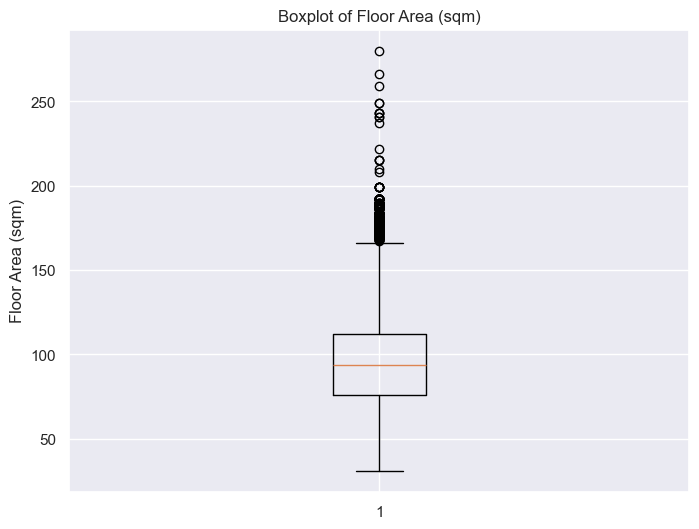

In [58]:
# Create a boxplot for 'floor_area_sqm' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['floor_area_sqm'])
plt.title('Boxplot of Floor Area (sqm)')
plt.ylabel('Floor Area (sqm)')
plt.grid(True)
plt.show()


In [59]:
# Calculate quartiles and IQR for 'floor_area_sqm'
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for 'floor_area_sqm'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the 'floor_area_sqm' column to the calculated bounds
df['floor_area_sqm'] = df['floor_area_sqm'].clip(lower=lower_bound, upper=upper_bound)
print(lower_bound,upper_bound)
# Now, if you want to see the lowest and highest values in the clipped 'floor_area_sqm' column:
lowest_value = df['floor_area_sqm'].min()
highest_value = df['floor_area_sqm'].max()

print("Lowest value in 'floor_area_sqm' column after clipping:", lowest_value)
print("Highest value in 'floor_area_sqm' column after clipping:", highest_value)


22.0 166.0
Lowest value in 'floor_area_sqm' column after clipping: 31.0
Highest value in 'floor_area_sqm' column after clipping: 166.0


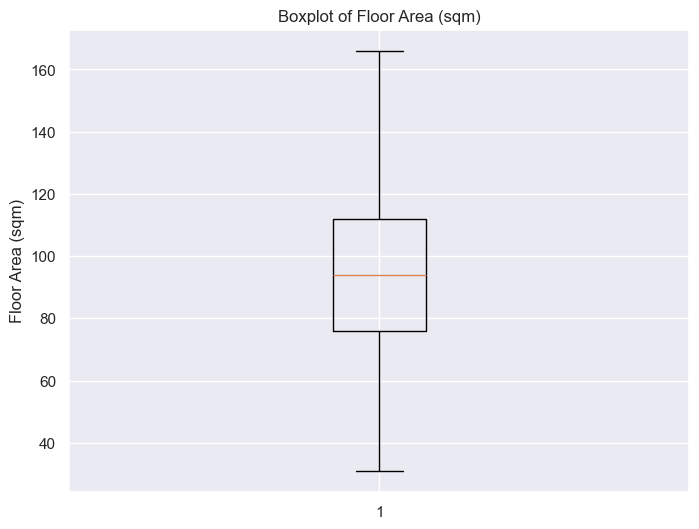

In [60]:
# Create a boxplot for 'floor_area_sqm' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['floor_area_sqm'])
plt.title('Boxplot of Floor Area (sqm)')
plt.ylabel('Floor Area (sqm)')
plt.grid(True)
plt.show()


##### Outlier detection in resale_price column

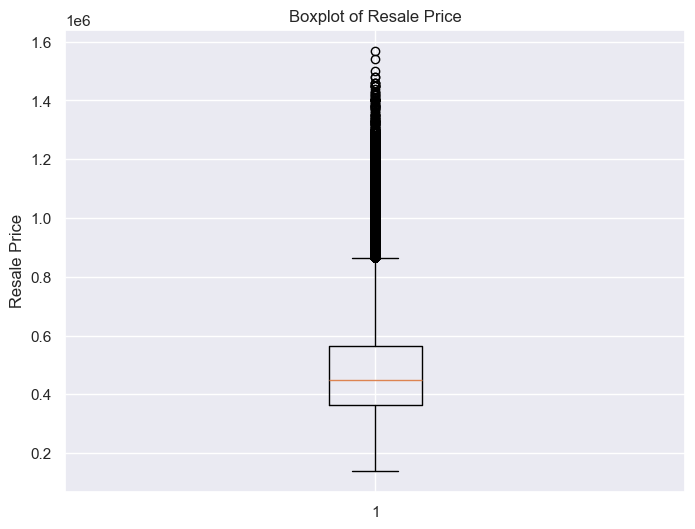

In [61]:
import matplotlib.pyplot as plt

# Create a boxplot for 'resale_price' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['resale_price'])
plt.title('Boxplot of Resale Price')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()


In [62]:
# Calculate quartiles and IQR for 'resale_price'
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for 'resale_price'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the 'resale_price' column to the calculated bounds
df['resale_price'] = df['resale_price'].clip(lower=lower_bound, upper=upper_bound)
print(lower_bound,upper_bound)

# Now, if you want to see the lowest and highest values in the clipped 'resale_price' column:
lowest_value = df['resale_price'].min()
highest_value = df['resale_price'].max()

print("Lowest value in 'resale_price' column after clipping:", lowest_value)
print("Highest value in 'resale_price' column after clipping:", highest_value)


65000.0 865000.0
Lowest value in 'resale_price' column after clipping: 140000.0
Highest value in 'resale_price' column after clipping: 865000.0


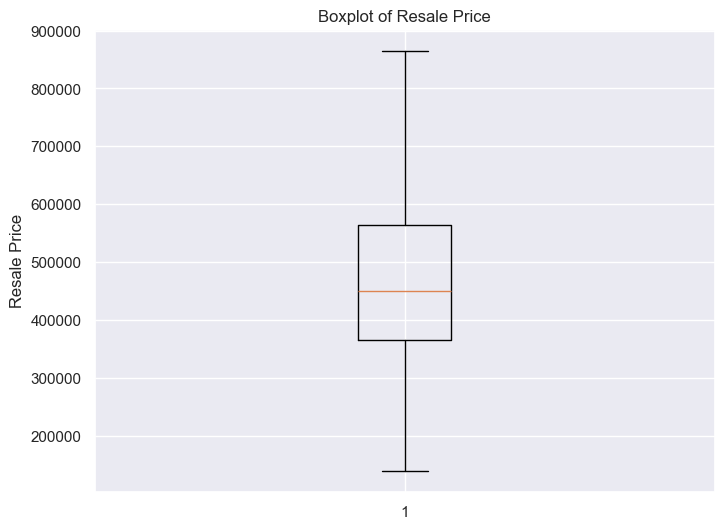

In [63]:
import matplotlib.pyplot as plt

# Create a boxplot for 'resale_price' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['resale_price'])
plt.title('Boxplot of Resale Price')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()


##### Outlier detection in remaining_lease column

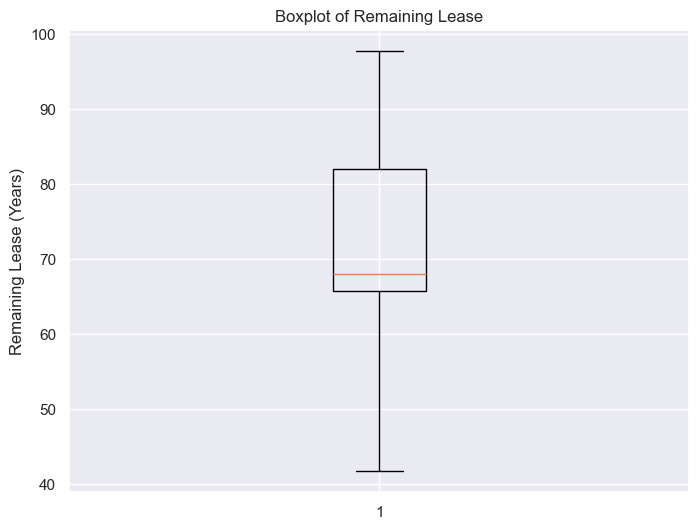

In [64]:
import matplotlib.pyplot as plt

# Create a boxplot for 'remaining_lease' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['remaining_lease'])
plt.title('Boxplot of Remaining Lease')
plt.ylabel('Remaining Lease (Years)')
plt.grid(True)
plt.show()


In [65]:
# Calculate quartiles and IQR for 'remaining_lease'
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for 'remaining_lease'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the 'remaining_lease' column to the calculated bounds
df['remaining_lease'] = df['remaining_lease'].clip(lower=lower_bound, upper=upper_bound)
print(lower_bound,upper_bound)

# Now, if you want to see the lowest and highest values in the clipped 'remaining_lease' column:
lowest_value = df['remaining_lease'].min()
highest_value = df['remaining_lease'].max()

print("Lowest value in 'remaining_lease' column after clipping:", lowest_value)
print("Highest value in 'remaining_lease' column after clipping:", highest_value)


41.16666666666668 106.5
Lowest value in 'remaining_lease' column after clipping: 41.75
Highest value in 'remaining_lease' column after clipping: 97.75


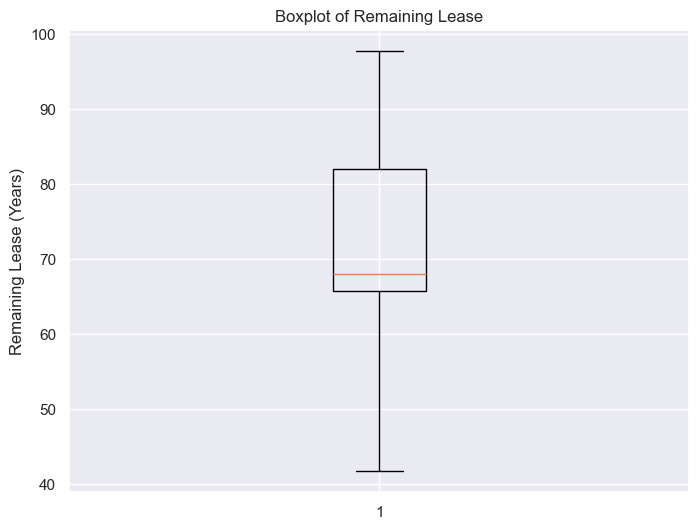

In [66]:
import matplotlib.pyplot as plt

# Create a boxplot for 'remaining_lease' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['remaining_lease'])
plt.title('Boxplot of Remaining Lease')
plt.ylabel('Remaining Lease (Years)')
plt.grid(True)
plt.show()


##### Outlier detection in lease_commence_date column

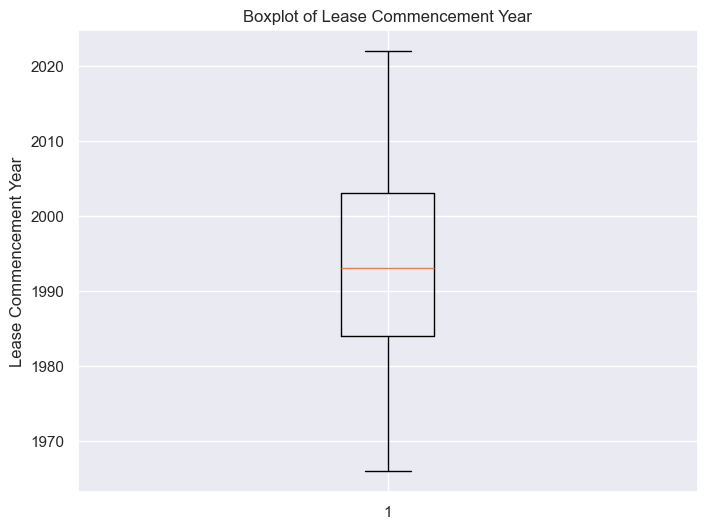

In [67]:
# Create a boxplot for 'lease_commence_date' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['lease_commence_date'])
plt.title('Boxplot of Lease Commencement Year')
plt.ylabel('Lease Commencement Year')
plt.grid(True)
plt.show()

In [68]:
# Calculate quartiles and IQR for 'lease_commence_date'
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for 'lease_commence_date'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the 'lease_commence_date' column to the calculated bounds
df['lease_commence_date'] = df['lease_commence_date'].clip(lower=lower_bound, upper=upper_bound)
print(lower_bound,upper_bound)

# Now, if you want to see the lowest and highest values in the clipped 'lease_commence_date' column:
lowest_value = df['lease_commence_date'].min()
highest_value = df['lease_commence_date'].max()

print("Lowest value in 'lease_commence_date' column after clipping:", lowest_value)
print("Highest value in 'lease_commence_date' column after clipping:", highest_value)



1955.5 2031.5
Lowest value in 'lease_commence_date' column after clipping: 1966
Highest value in 'lease_commence_date' column after clipping: 2022


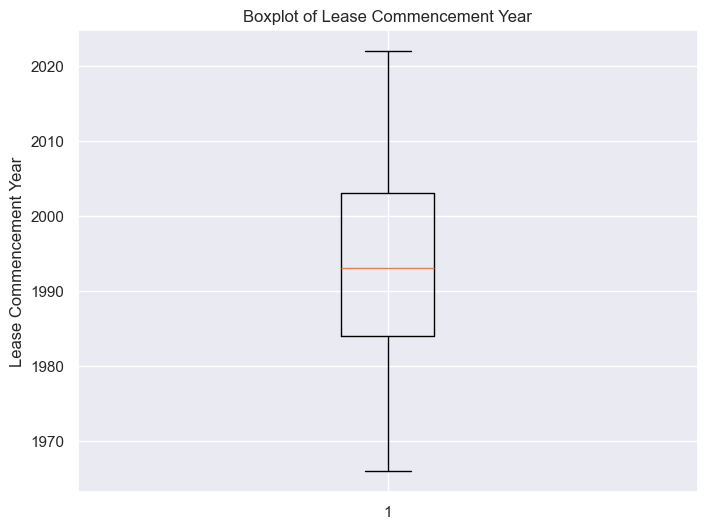

In [69]:
# Create a boxplot for 'lease_commence_date' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['lease_commence_date'])
plt.title('Boxplot of Lease Commencement Year')
plt.ylabel('Lease Commencement Year')
plt.grid(True)
plt.show()

##### Outlier detection in resale_year column

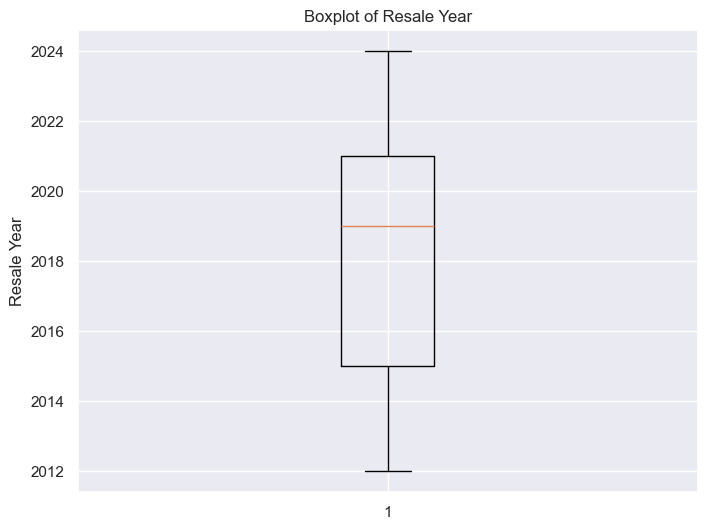

In [70]:
# Create a boxplot for 'resale_year' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['resale_year'])
plt.title('Boxplot of Resale Year')
plt.ylabel('Resale Year')
plt.grid(True)
plt.show()

In [71]:
# Calculate quartiles and IQR for 'resale_year'
Q1 = df['resale_year'].quantile(0.25)
Q3 = df['resale_year'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for 'resale_year'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the 'resale_year' column to the calculated bounds
df['resale_year'] = df['resale_year'].clip(lower=lower_bound, upper=upper_bound)
print(lower_bound,upper_bound)

# Now, if you want to see the lowest and highest values in the clipped 'resale_year' column:
lowest_value = df['resale_year'].min()
highest_value = df['resale_year'].max()

print("Lowest value in 'resale_year' column after clipping:", lowest_value)
print("Highest value in 'resale_year' column after clipping:", highest_value)



2006.0 2030.0
Lowest value in 'resale_year' column after clipping: 2012
Highest value in 'resale_year' column after clipping: 2024


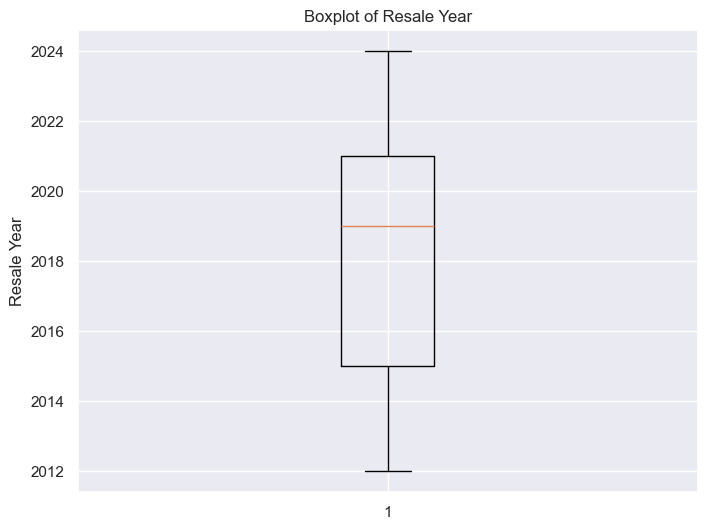

In [72]:
# Create a boxplot for 'resale_year' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['resale_year'])
plt.title('Boxplot of Resale Year')
plt.ylabel('Resale Year')
plt.grid(True)
plt.show()

##### Outlier detection in resale_month column

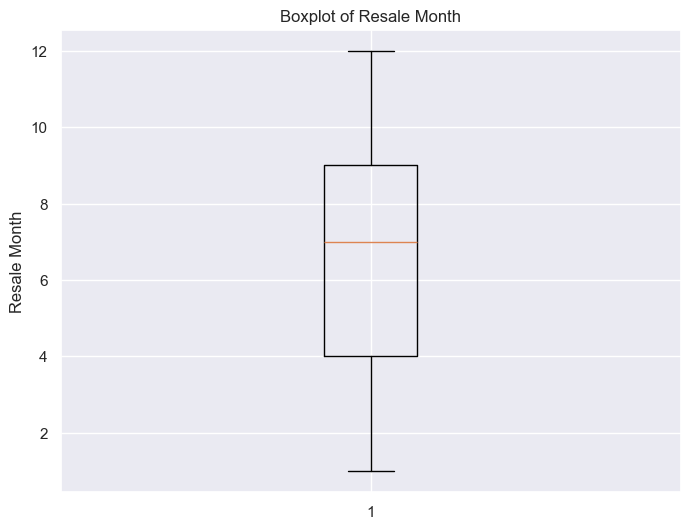

In [73]:
# Create a boxplot for 'resale_month' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['resale_month'])
plt.title('Boxplot of Resale Month')
plt.ylabel('Resale Month')
plt.grid(True)
plt.show()

In [74]:
# Calculate quartiles and IQR for 'resale_month'
Q1 = df['resale_month'].quantile(0.25)
Q3 = df['resale_month'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for 'resale_month'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the 'resale_month' column to the calculated bounds
df['resale_month'] = df['resale_month'].clip(lower=lower_bound, upper=upper_bound)
print(lower_bound,upper_bound)

# Now, if you want to see the lowest and highest values in the clipped 'resale_month' column:
lowest_value = df['resale_month'].min()
highest_value = df['resale_month'].max()

print("Lowest value in 'resale_month' column after clipping:", lowest_value)
print("Highest value in 'resale_month' column after clipping:", highest_value)



-3.5 16.5
Lowest value in 'resale_month' column after clipping: 1
Highest value in 'resale_month' column after clipping: 12


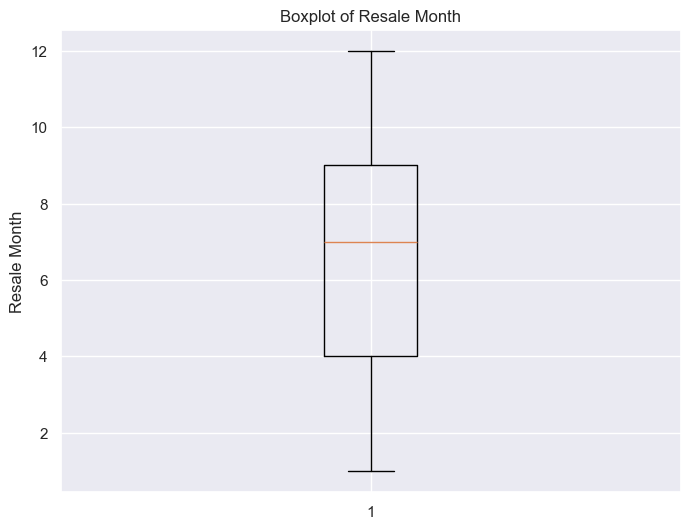

In [75]:
# Create a boxplot for 'resale_month' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['resale_month'])
plt.title('Boxplot of Resale Month')
plt.ylabel('Resale Month')
plt.grid(True)
plt.show()

##### Outlier detection in storey_lower_bound column

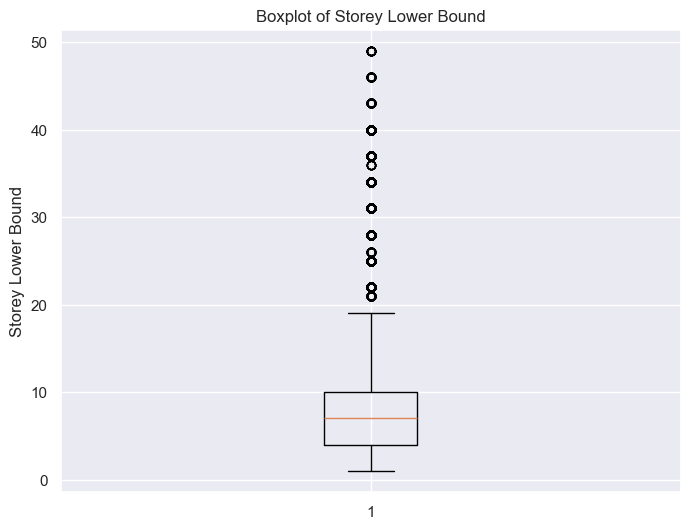

In [76]:
# Create a boxplot for 'storey_lower_bound' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['storey_lower_bound'])
plt.title('Boxplot of Storey Lower Bound')
plt.ylabel('Storey Lower Bound')
plt.grid(True)
plt.show()

In [77]:
# Calculate quartiles and IQR for 'storey_lower_bound'
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for 'storey_lower_bound'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the 'storey_lower_bound' column to the calculated bounds
df['storey_lower_bound'] = df['storey_lower_bound'].clip(lower=lower_bound, upper=upper_bound)
print(lower_bound,upper_bound)

# Now, if you want to see the lowest and highest values in the clipped 'storey_lower_bound' column:
lowest_value = df['storey_lower_bound'].min()
highest_value = df['storey_lower_bound'].max()

print("Lowest value in 'storey_lower_bound' column after clipping:", lowest_value)
print("Highest value in 'storey_lower_bound' column after clipping:", highest_value)

-5.0 19.0
Lowest value in 'storey_lower_bound' column after clipping: 1
Highest value in 'storey_lower_bound' column after clipping: 19


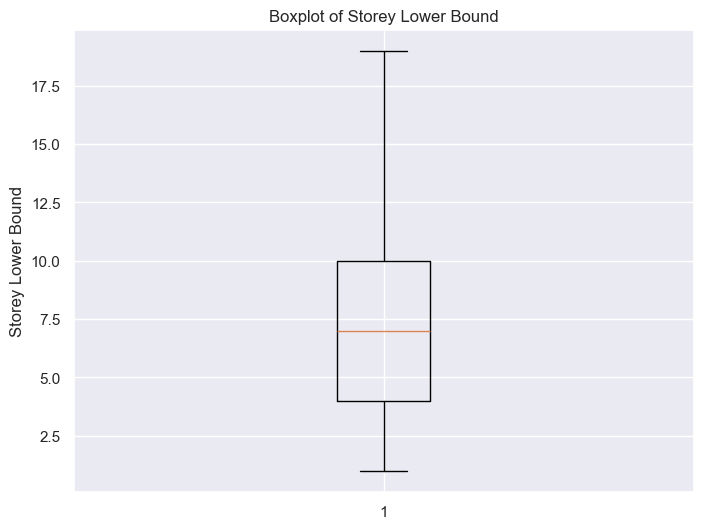

In [78]:
# Create a boxplot for 'storey_lower_bound' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['storey_lower_bound'])
plt.title('Boxplot of Storey Lower Bound')
plt.ylabel('Storey Lower Bound')
plt.grid(True)
plt.show()

##### Outlier detection in storey_upper_bound column

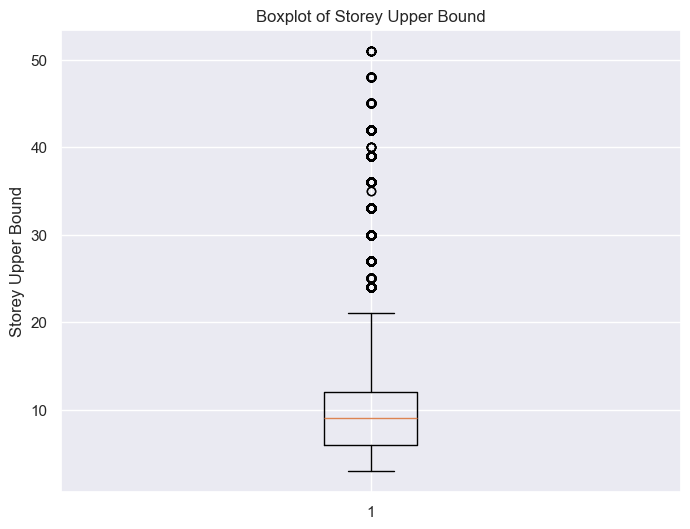

In [79]:
# Create a boxplot for 'storey_upper_bound' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['storey_upper_bound'])
plt.title('Boxplot of Storey Upper Bound')
plt.ylabel('Storey Upper Bound')
plt.grid(True)
plt.show()

In [80]:
# Calculate quartiles and IQR for 'storey_upper_bound'
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for 'storey_upper_bound'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the 'storey_upper_bound' column to the calculated bounds
df['storey_upper_bound'] = df['storey_upper_bound'].clip(lower=lower_bound, upper=upper_bound)
print(lower_bound,upper_bound)

# Now, if you want to see the lowest and highest values in the clipped 'storey_upper_bound' column:
lowest_value = df['storey_upper_bound'].min()
highest_value = df['storey_upper_bound'].max()

print("Lowest value in 'storey_upper_bound' column after clipping:", lowest_value)
print("Highest value in 'storey_upper_bound' column after clipping:", highest_value)

-3.0 21.0
Lowest value in 'storey_upper_bound' column after clipping: 3
Highest value in 'storey_upper_bound' column after clipping: 21


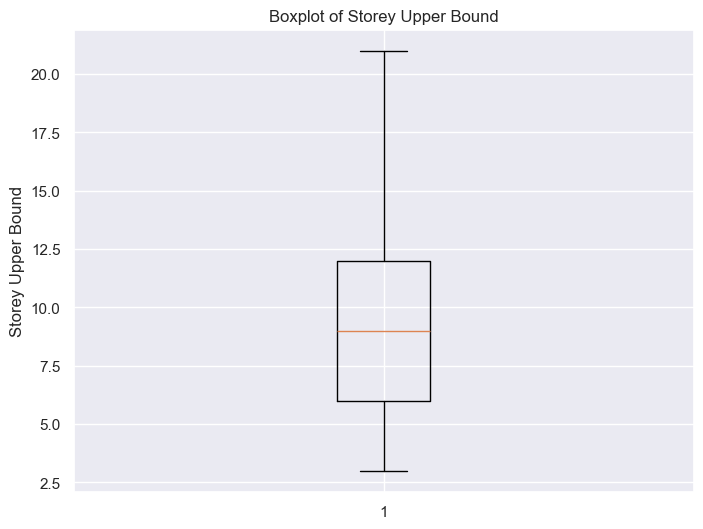

In [81]:
# Create a boxplot for 'storey_upper_bound' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['storey_upper_bound'])
plt.title('Boxplot of Storey Upper Bound')
plt.ylabel('Storey Upper Bound')
plt.grid(True)
plt.show()

## Exploratory data analysis

### Catogorical vs Frequency using bar plot

In [82]:
object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

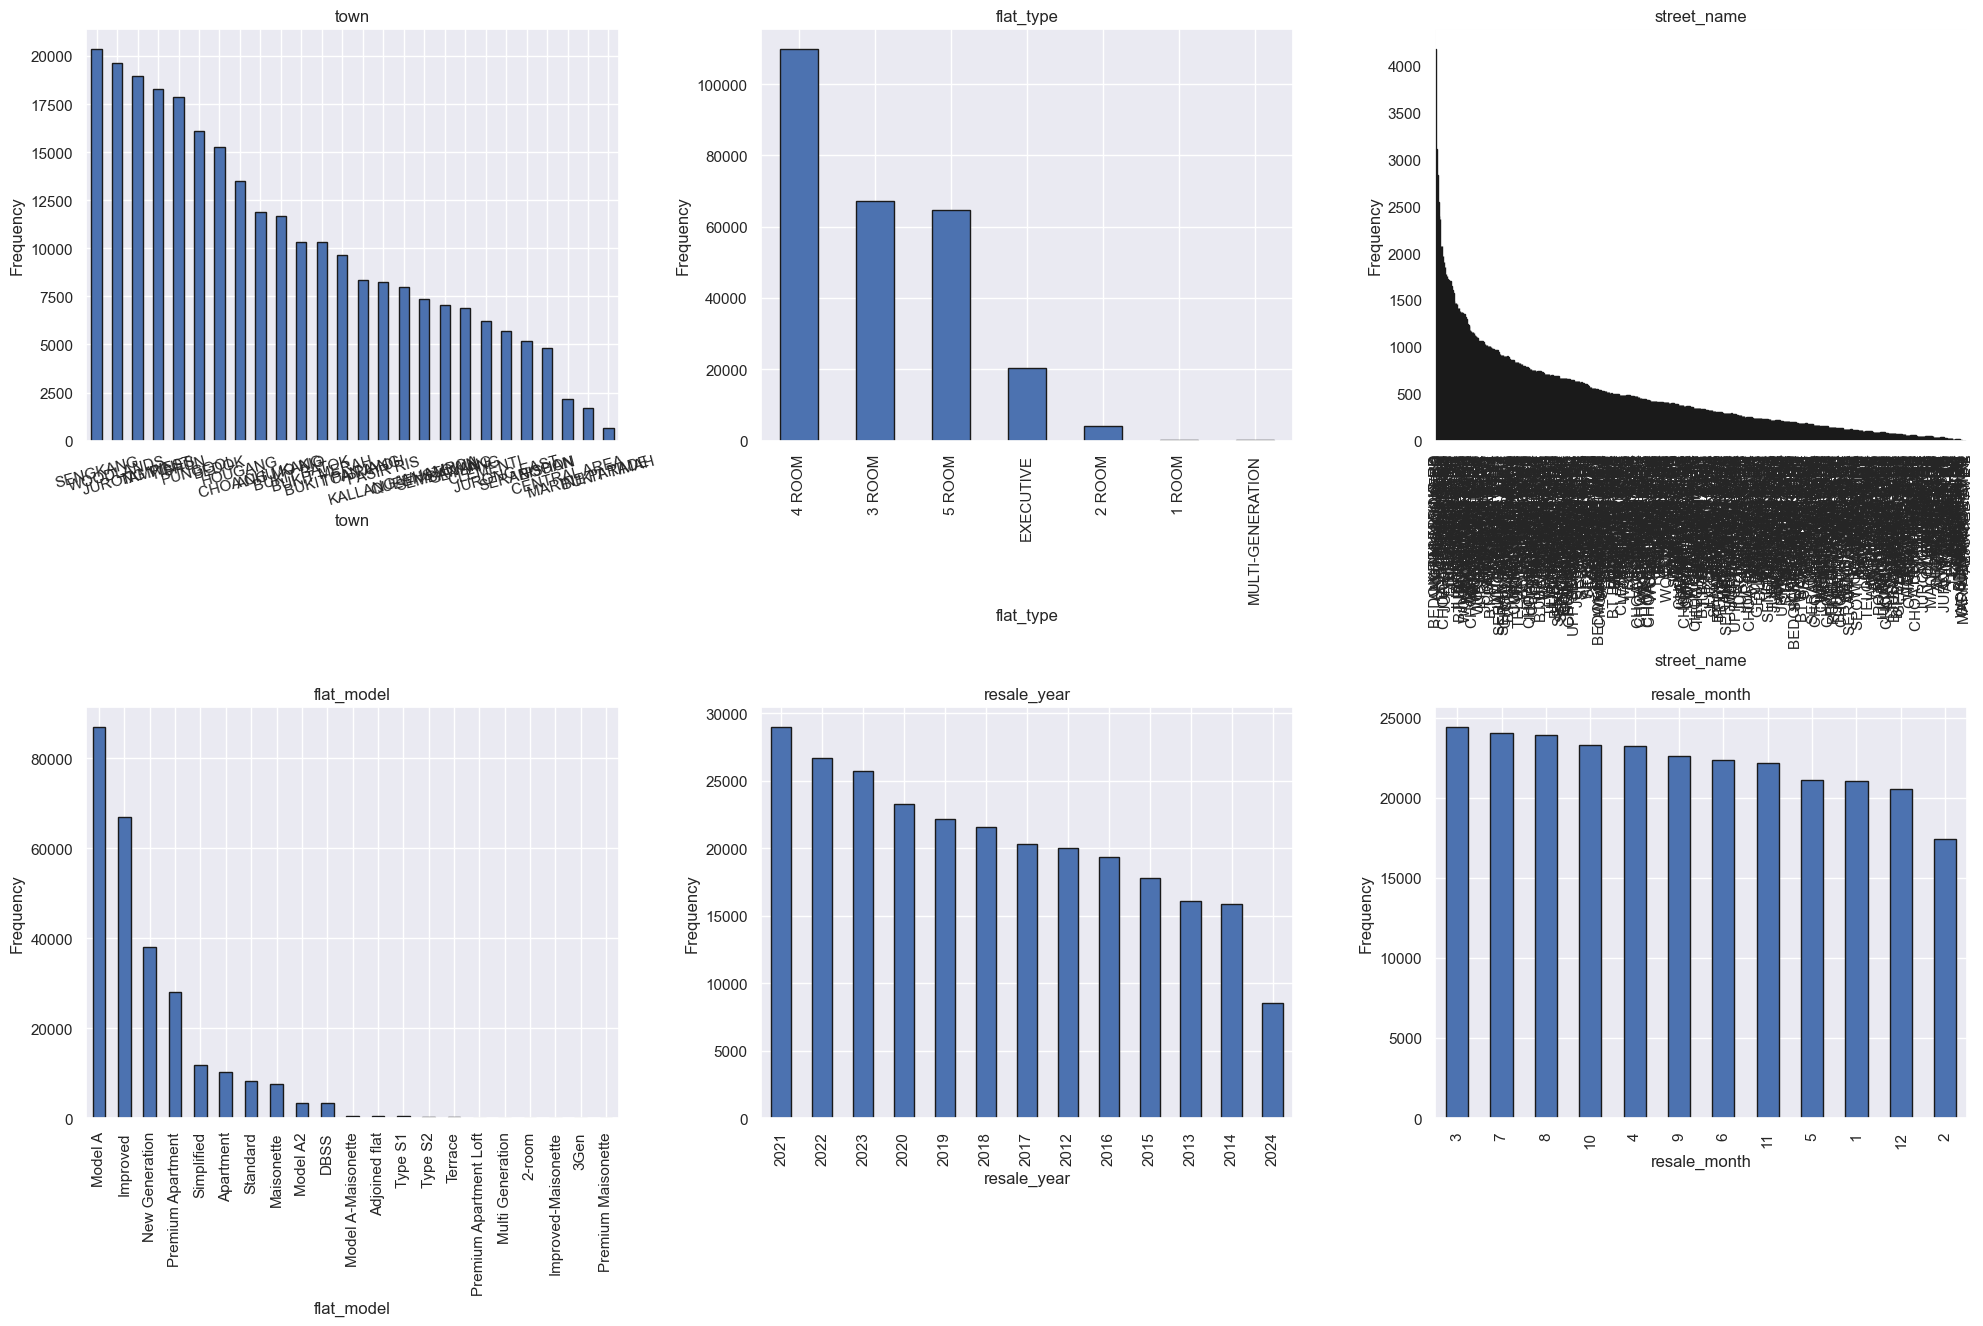

In [83]:
plt.figure(figsize=(20,25))

plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Features vs Target Variable

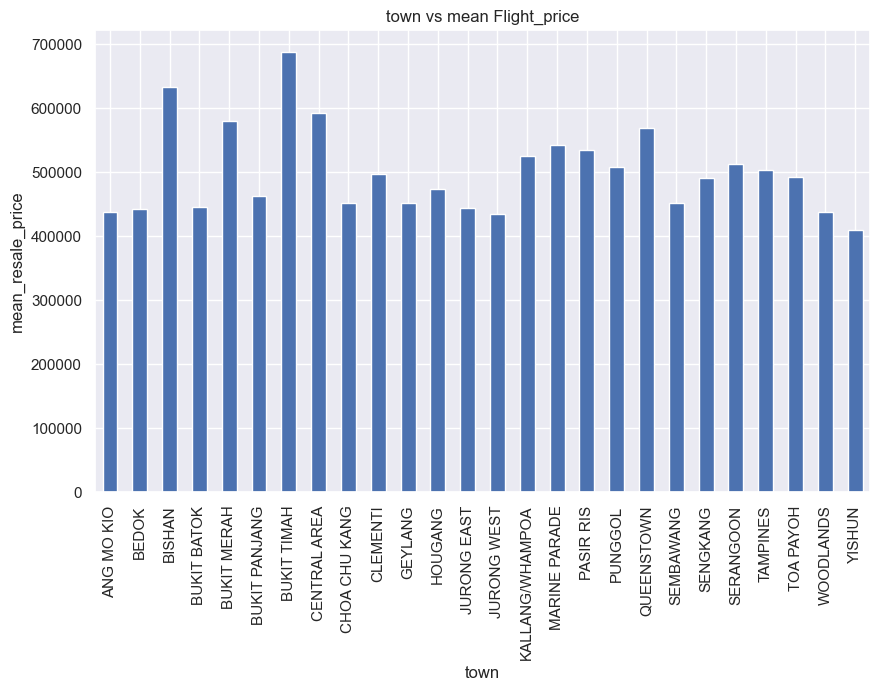

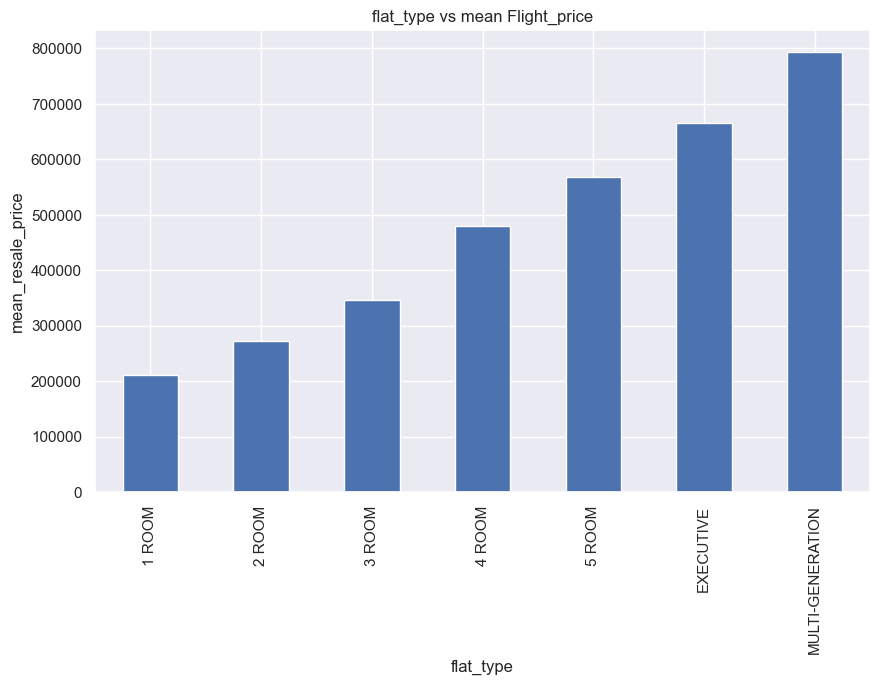

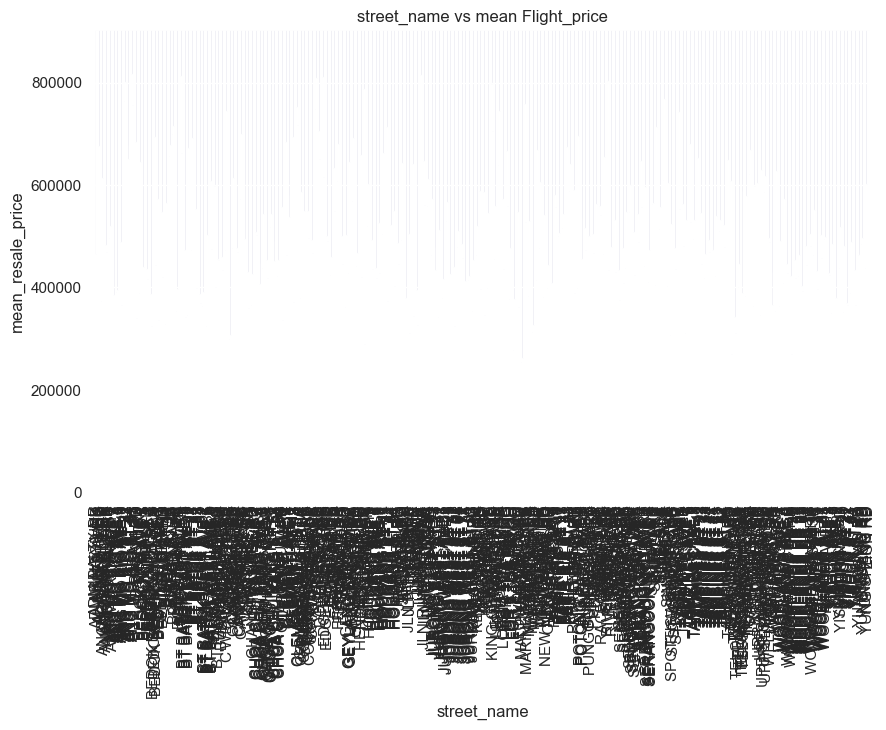

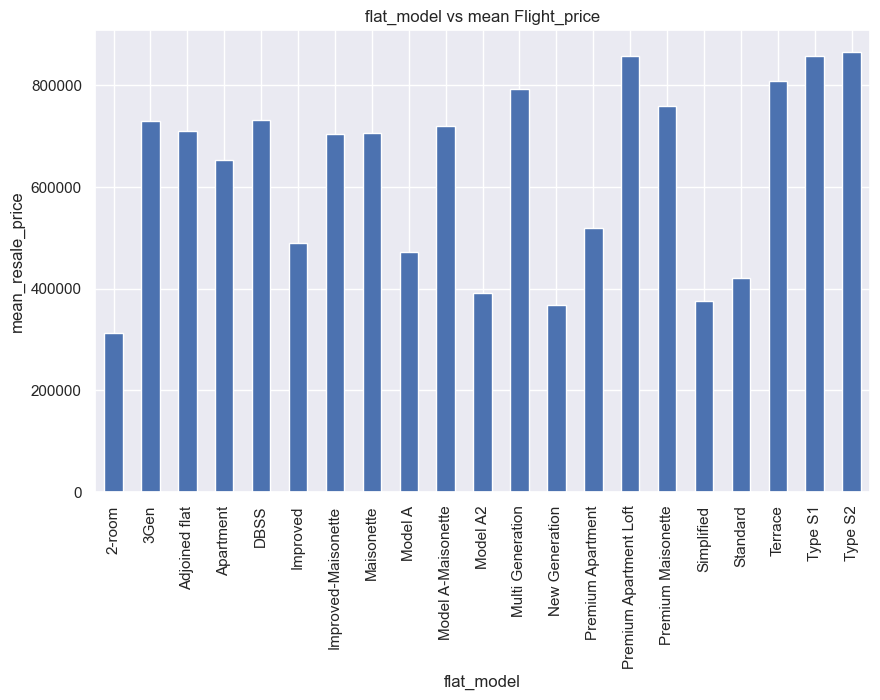

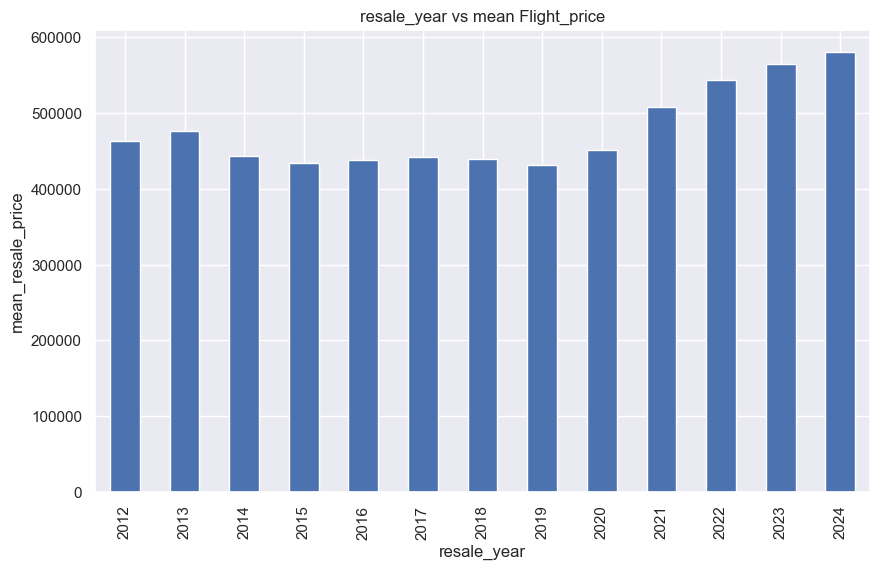

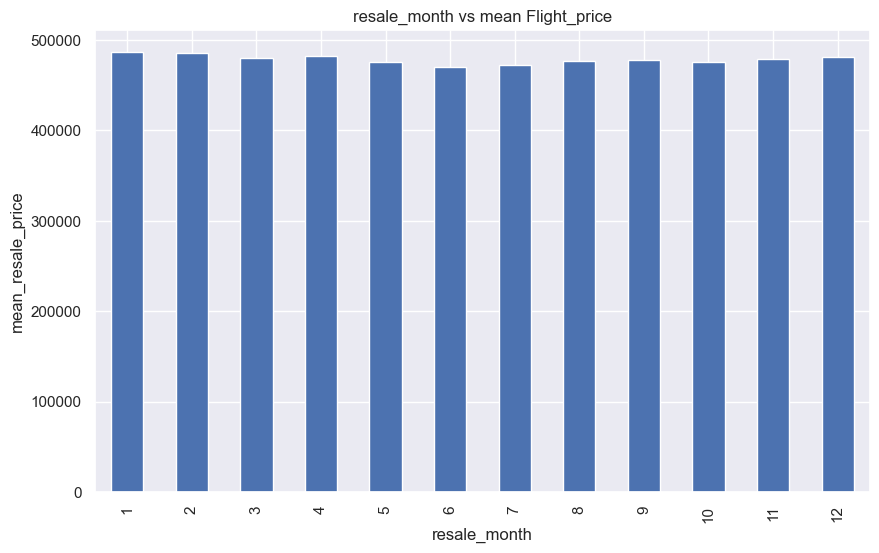

In [84]:
#List of features to plot
features=[
    'town',
    'flat_type',
    'street_name',
    'flat_model',
    'resale_year',
    'resale_month'
    
]

for feature in features:
    plt.figure(figsize=(10,6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('mean_resale_price')
    plt.title(f'{feature} vs mean Flight_price')
    plt.show()

### Feature vs Target(Continious data)

In [85]:
float_data_cols=[var for var in df.columns if df[var].dtype=='float_64']
float_data_cols

[]

In [86]:
integer_data_cols=[var for var in df.columns if df[var].dtype =='int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

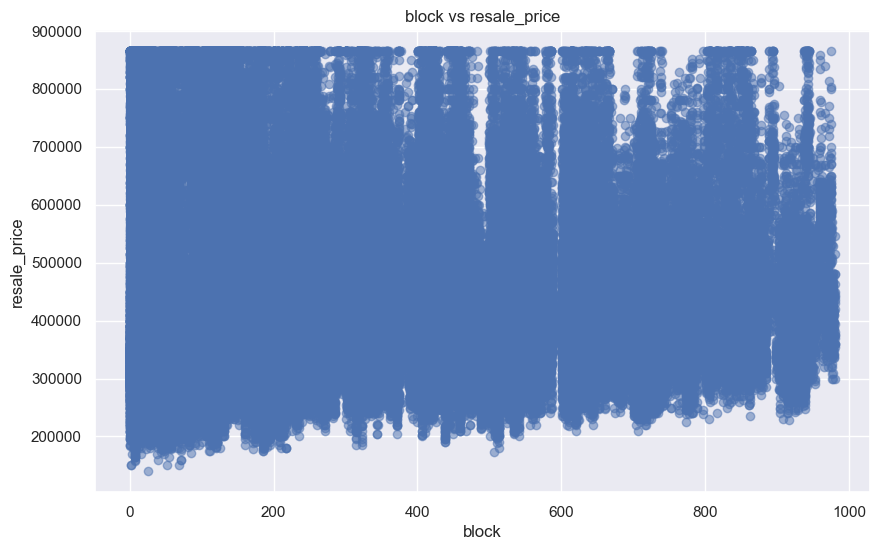

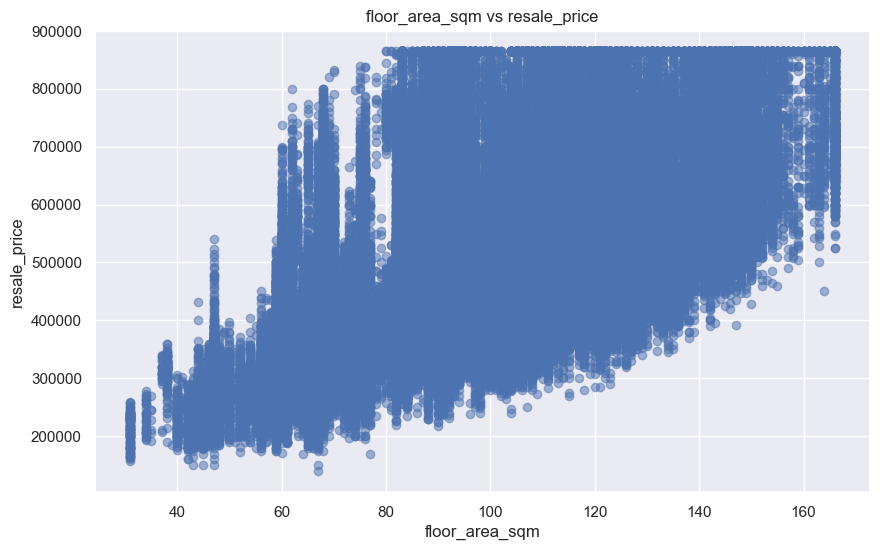

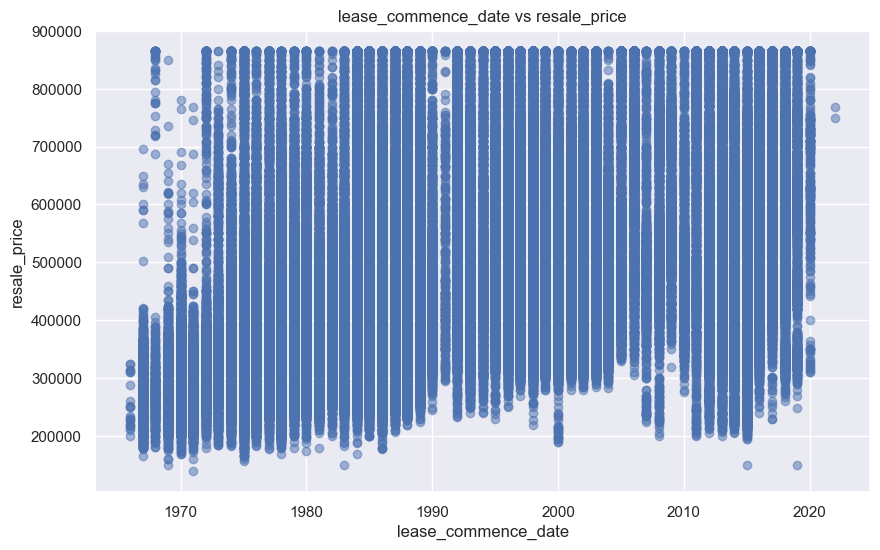

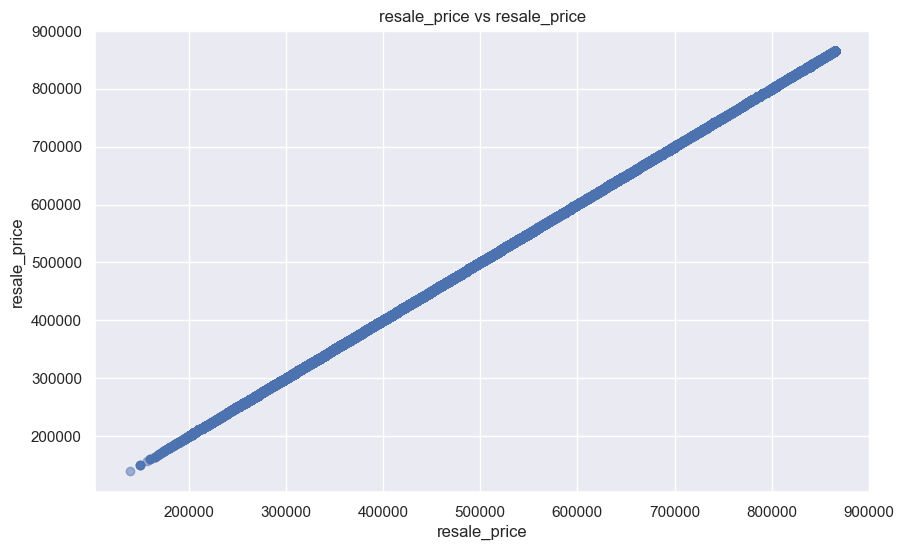

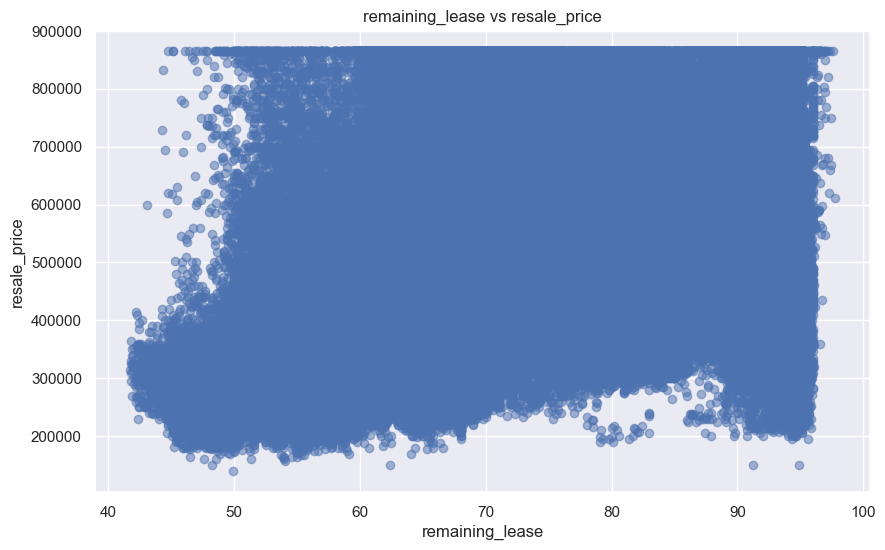

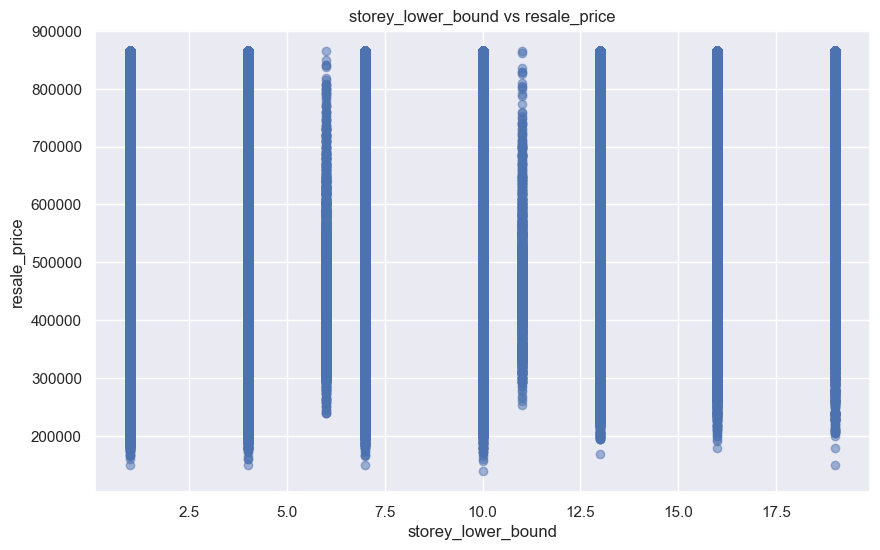

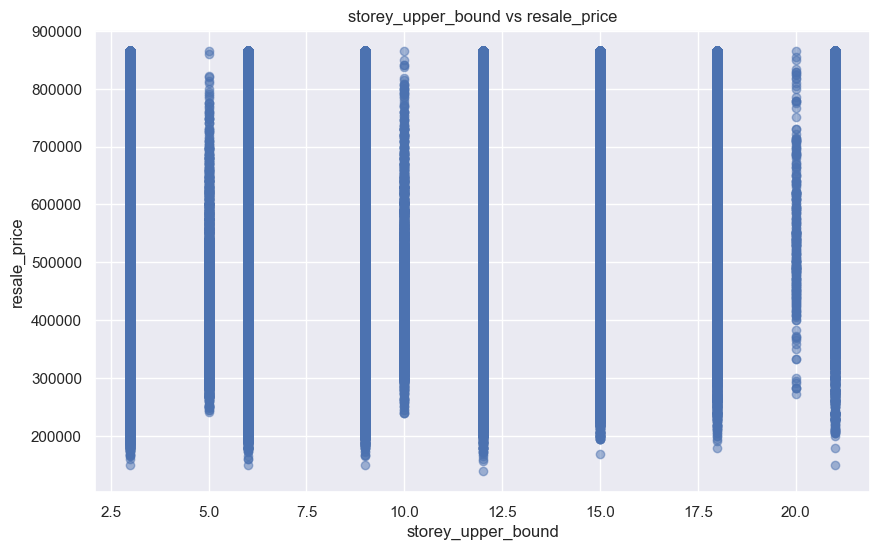

In [87]:
features=['block',
          'floor_area_sqm',
          'lease_commence_date',
          'resale_price',
          'remaining_lease',
          'storey_lower_bound',
          'storey_upper_bound']

target='resale_price'
for feature in features:
    plt.figure(figsize=(10,6))
    plt.scatter(df[feature],df[target],alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

### Encoding categorical variabels

In [130]:
#using encoding make a copy
df1=df.copy()

object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [131]:
from sklearn.preprocessing  import LabelEncoder
#initialise the Encoder
le=LabelEncoder()

In [132]:
#list unique street names
streets=df1['street_name'].unique()
#map the streets to provide the input to the ML model 
streets_mapping ={street:idx+1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 4': 1,
 'ANG MO KIO AVE 8': 2,
 'ANG MO KIO AVE 10': 3,
 'ANG MO KIO AVE 5': 4,
 'ANG MO KIO AVE 3': 5,
 'ANG MO KIO AVE 1': 6,
 'ANG MO KIO AVE 9': 7,
 'ANG MO KIO AVE 6': 8,
 'ANG MO KIO ST 32': 9,
 'ANG MO KIO ST 52': 10,
 'ANG MO KIO ST 21': 11,
 'ANG MO KIO ST 31': 12,
 'BEDOK RESERVOIR RD': 13,
 'BEDOK NTH ST 3': 14,
 'BEDOK NTH RD': 15,
 'CHAI CHEE RD': 16,
 'BEDOK STH AVE 1': 17,
 'BEDOK NTH ST 4': 18,
 'BEDOK NTH ST 2': 19,
 'BEDOK STH RD': 20,
 'CHAI CHEE DR': 21,
 'CHAI CHEE AVE': 22,
 'BEDOK NTH AVE 1': 23,
 'BEDOK STH AVE 3': 24,
 'NEW UPP CHANGI RD': 25,
 'BEDOK NTH AVE 4': 26,
 'BEDOK NTH ST 1': 27,
 'BEDOK NTH AVE 3': 28,
 'BEDOK NTH AVE 2': 29,
 'BEDOK STH AVE 2': 30,
 'CHAI CHEE ST': 31,
 'BEDOK RESERVOIR VIEW': 32,
 'JLN TENAGA': 33,
 'JLN DAMAI': 34,
 'LENGKONG TIGA': 35,
 'BEDOK CTRL': 36,
 'SIN MING AVE': 37,
 'BISHAN ST 11': 38,
 'BISHAN ST 12': 39,
 'BISHAN ST 13': 40,
 'BISHAN ST 22': 41,
 'BISHAN ST 24': 42,
 'BISHAN ST 23': 43,
 'SHUNFU RD': 

In [133]:
#alter the column  with the mapped numbers 
df1['street_name']=df1['street_name'].map(streets_mapping)

#dispaly the dataframe 
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,2 ROOM,172.0,1,45.0,Improved,1986,250000.0,68.0,2012,3,6,10
1,ANG MO KIO,2 ROOM,510.0,2,44.0,Improved,1980,265000.0,68.0,2012,3,1,5


In [134]:
df1['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION', '1 ROOM'], dtype=object)

In [135]:
category_mapping={
    '1 ROOM':1,
    '2 ROOM':2,
    '3 ROOM':3,
    '4.ROOM':4,
    '5.ROOM':5,
    'EXECUTIVE':6,
    'MULTI GENERATION':7
}

#alter the column with the mapped numbers 
df1['flat_type']=df1['flat_type'].map(category_mapping)

#display the dataframe
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,2.0,172.0,1,45.0,Improved,1986,250000.0,68.0,2012,3,6,10
1,ANG MO KIO,2.0,510.0,2,44.0,Improved,1980,265000.0,68.0,2012,3,1,5


In [136]:
# creating a mapping of 'flat_model' values to numbers 
flat_model_mapping={
    'IMPROVED':1,
    'NEW GENERATION':2,
    'MODEL A':3,
    'STANDARD':4,
    'SIMPLIFIED':5,
    'MODEL A-MAISONETTE':6,
    'APARTMENT':7,
    'MAISONETTE':8,
    'TERRACE':9,
    '2-ROOM':10,
    'IMPROVED-MAISONETTE':11,
    'MULTI GENERATION':12,
    'PREMIUM APARTMENT':13,
    'Improved':14,
    'New Generation':15,
    'Model A':16,
    'Standard':17,
    'Apartment':18,
    'Simplified':19,
    'Model A-Maisonette':20,
    'Maisonette':21,
    'Multi Generation':22,
    'Adjoineed flat':23,
    'Premium Apartment':24,
    'Terrace':25,
    'Improved Maisonette':26,
     'Premium Maisonette':27,
     '2-room':28,
     'Model A2':29,
     'DBSS':30,
     'Type S1':31,
     'Type S2':32,
     'Premium Apartment Loft':33,
     '3Gen':34


}

#map ''flat_model' values to numbers 

df1['flat_model']=df1['flat_model'].map(flat_model_mapping)

#Display the Dataframe
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,2.0,172.0,1,45.0,14.0,1986,250000.0,68.0,2012,3,6,10
1,ANG MO KIO,2.0,510.0,2,44.0,14.0,1980,265000.0,68.0,2012,3,1,5
2,ANG MO KIO,3.0,610.0,1,68.0,15.0,1980,315000.0,68.0,2012,3,6,10


In [138]:
#create a mapping of  'town' values to numbers 
town_mapping={
    'ANG MO KIO':1,
    'BEDOK':2,
    'BISHAN':3,
    'BHUKIT BATOK':4,
    'BHUKIT MERAH':5,
     'BHUKIT TIMAH':6,
     'CENTRAL AREA':7,
     'CHOA CHU KANG':8,
     'CLEMENTI':9,
     'GEYLANG':10,
     'HOUGANG':11,
     'JURONG EAST':12,
     'JURONG WEST':13,
     'KALLANG/WHAMPOA':14,
     'MARINE PARADE':15,
     'QUEENSTOWN':16,
     'SENGKANG':17,
     'SERANGOON':18,
     'TAMPINES':19,
      'TOA PAYOH':20,
      'WOODLANDS':21,
      'YISHUN':22,
      'LIM CHU KANG':23,
      'SEMBAWANG':24,
      'BUKIT PANJANG':25,
      'PASIR RIS':26,
      'PUNGGOL':27

    
}

#Map 'town' values to numbers 
df1['town']=df1['town'].map(town_mapping)

#Display the dataframe 
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1.0,2.0,172.0,1,45.0,14.0,1986,250000.0,68.0,2012,3,6,10
1,1.0,2.0,510.0,2,44.0,14.0,1980,265000.0,68.0,2012,3,1,5
2,1.0,3.0,610.0,1,68.0,15.0,1980,315000.0,68.0,2012,3,6,10
3,1.0,3.0,474.0,3,67.0,15.0,1984,320000.0,68.0,2012,3,1,5


In [139]:
df1

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1.0,2.0,172.0,1,45.0,14.0,1986,250000.0,68.000000,2012,3,6,10
1,1.0,2.0,510.0,2,44.0,14.0,1980,265000.0,68.000000,2012,3,1,5
2,1.0,3.0,610.0,1,68.0,15.0,1980,315000.0,68.000000,2012,3,6,10
3,1.0,3.0,474.0,3,67.0,15.0,1984,320000.0,68.000000,2012,3,1,5
4,1.0,3.0,604.0,4,67.0,15.0,1980,321000.0,68.000000,2012,3,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267044,22.0,6.0,652.0,410,166.0,18.0,1992,865000.0,67.250000,2024,4,7,9
267045,22.0,6.0,392.0,403,142.0,18.0,1988,780888.0,63.250000,2024,4,7,9
267046,22.0,6.0,324.0,405,146.0,18.0,1988,830000.0,63.333333,2024,4,4,6
267047,22.0,6.0,326.0,400,146.0,21.0,1988,865000.0,63.333333,2024,4,4,6


In [140]:
#save the processed data for the deployment 
df1.to_csv('final.csv')

In [141]:
#correlation matrix (ranges from 1 to -1)
corrm=df1.corr()

#corrm.to_csv('corrm_csv')
corrm 

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.211838,-0.074770,0.631381,0.151639,0.161196,0.362282,0.023868,0.327960,0.054094,0.003827,0.012933,0.012429
flat_type,0.211838,1.000000,0.220634,0.074074,0.977998,0.631227,0.240382,0.838496,0.164387,-0.015292,0.010991,-0.030619,-0.030184
block,-0.074770,0.220634,1.000000,-0.123006,0.174118,-0.086636,-0.265920,-0.146728,-0.271256,-0.126355,0.000619,-0.184369,-0.182838
street_name,0.631381,0.074074,-0.123006,1.000000,0.062352,0.172774,0.356302,0.097283,0.339994,0.116033,0.002001,0.035367,0.033755
floor_area_sqm,0.151639,0.977998,0.174118,0.062352,1.000000,0.145984,0.204932,0.634675,0.144428,-0.002213,0.004973,0.012391,0.012479
flat_model,0.161196,0.631227,-0.086636,0.172774,0.145984,1.000000,0.342910,0.224902,0.311482,0.040796,-0.002274,0.083491,0.082864
lease_commence_date,0.362282,0.240382,-0.265920,0.356302,0.204932,0.342910,1.000000,0.394929,0.925122,0.238228,-0.002093,0.258227,0.255217
resale_price,0.023868,0.838496,-0.146728,0.097283,0.634675,0.224902,0.394929,1.000000,0.318594,0.224505,-0.012347,0.307047,0.305773
remaining_lease,0.327960,0.164387,-0.271256,0.339994,0.144428,0.311482,0.925122,0.318594,1.000000,0.157618,-0.005191,0.248145,0.244261
resale_year,0.054094,-0.015292,-0.126355,0.116033,-0.002213,0.040796,0.238228,0.224505,0.157618,1.000000,-0.085948,0.080133,0.062233


### Heat map

<Axes: >

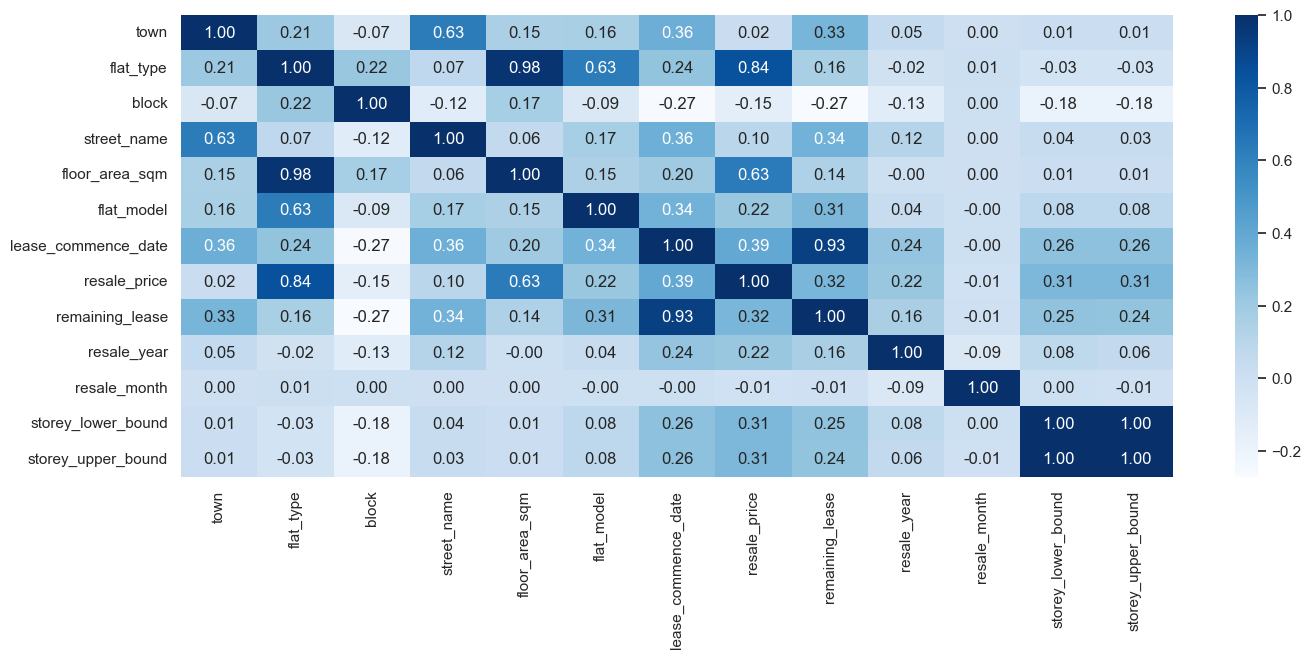

In [142]:
#visualize the correlation matrix in seaborn using a heatmap 
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

### Machine learning

In [143]:
#splitting the dataframe 
#assign feature and target variable 
x=df1.drop('resale_price',axis=1)
y=df1['resale_price']
#splitting the data into training and  testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
x_train, x_test,y_train ,y_test=train_test_split(x,y,test_size=0.2,random_state=72)

In [144]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(212989, 12) (53248, 12) (212989,) (53248,)


### Scaling

In [145]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled,x_test_scaled

(array([[-1.80350553,         nan, -0.52074218, ...,  1.60601622,
         -0.04014887, -0.05040373],
        [-0.34851569,         nan,  1.82374055, ...,  0.71894817,
         -0.04014887, -0.05040373],
        [ 0.31284333, -0.47959072, -0.12560464, ...,  1.31032687,
         -0.65252847, -0.66395097],
        ...,
        [-0.8776029 , -0.47959072,  1.72589697, ..., -0.16811988,
          0.57223072,  0.56314351],
        [ 0.44511513,         nan,  1.73718661, ..., -1.64656662,
         -0.65252847, -0.66395097],
        [ 0.57738694,         nan,  0.05502966, ..., -1.35087727,
         -1.26490807, -1.27749821]]),
 array([[ 0.84193055, -0.47959072,  2.3242481 , ...,  1.31032687,
         -0.65252847, -0.66395097],
        [        nan, -0.47959072, -0.70137648, ..., -1.05518793,
          2.40936952,  2.40378522],
        [ 0.70965874,  1.84712806,  2.08716558, ..., -0.16811988,
         -0.04014887, -0.05040373],
        ...,
        [ 0.84193055,         nan, -0.90835329, ...,  

In [436]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### Fitting the model

In [146]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  #using XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### K Nearest Neighbor Regression

In [147]:
#x train_scaled and y train_scaled has null values so replacing them with x_train_imputed,x_test_imputed

from sklearn.impute import SimpleImputer

# Instantiate the imputer with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on training data
x_train_imputed = imputer.fit_transform(x_train_scaled)

# Transform the test data using the trained imputer
x_test_imputed = imputer.transform(x_test_scaled)

In [148]:
#create and train the K Nearest Neighbor Regression model 
knn_regressor=KNeighborsRegressor(n_neighbors=5) #may need to adjust number of neighbours 
knn_regressor.fit(x_train_imputed,y_train)

#make predictions on the test set using KNN model 
y_pred_knn=knn_regressor.predict(x_test_imputed)

#calculate Mean Absolute error (MAE)
mae_knn=mean_absolute_error(y_test,y_pred_knn)

#calculate Mean Squared error (MSE)
mse_knn=mean_squared_error(y_test,y_pred_knn)

#calculate the root mean squared error
rmse_knn=np.sqrt(mse_knn)

#calculate R-squared (r2 ) score:
r2_knn=r2_score(y_test,y_pred_knn)

print("Mean Absolute Error(MAE)    :",mae_knn)
print("Mean Squared Error (MSE)    :",mse_knn)
print("Root Mean square Error(RMSE):",rmse_knn)
print("R-squared(r2)score          :",r2_knn)

Mean Absolute Error(MAE)    : 35688.317066819414
Mean Squared Error (MSE)    : 2952760189.440095
Root Mean square Error(RMSE): 54339.3061185004
R-squared(r2)score          : 0.8729128541095229


### Decision Tree Regression

In [149]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [150]:
#CREATE AND TRAIN THE DECISION TREE REGRESSOR MODEL 
dt_regressor=DecisionTreeRegressor(max_depth=20,random_state=11)
dt_regressor.fit(x_train,y_train)

#make prediction on the test set using decision tree model 
y_pred_dt=dt_regressor.predict(x_test) 

#calculating the mean absolute error (MAE)
mae_dt=mean_absolute_error(y_test,y_pred_dt)

#calculating the mean squared error 
mse_dt=mean_squared_error(y_test,y_pred_dt)

#calculating Root mean squared error 
r2_dt=r2_score(y_test,y_pred_dt)

print("Mean Absolute Error (MAE)   :",mae_dt)
print("Mean Squared Error (MSE))  :" ,mse_dt)
print("Root Mean Squared Error (RMSE):" ,r2_dt)

Mean Absolute Error (MAE)   : 23190.807592888537
Mean Squared Error (MSE))  : 1149909968.2968786
Root Mean Squared Error (RMSE): 0.9505077396991152


### Random Forest Regression

In [151]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

#create and train the random forest regressor model 
rf_regressor=RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train,y_train)

# make prediction using the test set 
y_pred=rf_regressor.predict(x_test)

#calculate mean absolute error (MAE)
mae=mean_absolute_error(y_test,y_pred)

#calculate the mean squared error (MSE)
mse=mean_squared_error(y_test,y_pred)

#calculating the root mean squared error
rmse=np.sqrt(mse)

#calculate the R-squared (R2) score
rf_r2=r2_score(y_test,y_pred)

print("Mean Absolute Error(MAE)  :",mae)
print("Mean Squared Error(MSE)    :",mse)
print("Root Mean Square Error (RMSE):",rmse)
print("R-squared (R2)score          :",rf_r2 )

Mean Absolute Error(MAE)  : 18132.75994358673
Mean Squared Error(MSE)    : 647720860.6319555
Root Mean Square Error (RMSE): 25450.36071712846
R-squared (R2)score          : 0.9721220179661635


### XG Boost Regression 

In [152]:
#create and train an XGBOOST REGRESSOR 
xgregressor= XGBRegressor()
xgregressor.fit(x_train,y_train)

#make predictions
y_pred=xgregressor.predict(x_test)

#calculating mean absolute error (MAE)
mae=mean_absolute_error(y_test,y_pred)

#calculating mean squared error (MSE)
mse=mean_squared_error(y_test,y_pred)

#calculating the root mean squared error (RMSE)
rmse=np.sqrt(mse)

#calcualte R-squared (r2) score
xgb_r2=r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE)   :",mae)
print("Mean squared Error(MSE)  :",mse)
print("Root Mean Squared Error (RMSE)     :",rmse)
print("R-squared (R2) Score      :",xgb_r2)

Mean Absolute Error (MAE)   : 21344.472051825895
Mean squared Error(MSE)  : 835172280.7880954
Root Mean Squared Error (RMSE)     : 28899.347411111125
R-squared (R2) Score      : 0.9640540867924918


### Finalzing the models

In [153]:
models=['KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor']
score=[r2_knn,r2_dt,rf_r2,xgb_r2]

fig=px.bar(x=models, y=score , title='R_2 Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score=max(score)  #Intialise max_score with the maximum value in the score list \
max_model=""

for model , score_value in zip(models,score):
    print(model,score_value)
    if score_value ==max_score:
        max_model=model

print(f"\nModel: {max_model} contain Maximum R2_Score:{max_score}")


FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.8729128541095229
DecisionTreeRegressor 0.9505077396991152
RandomForestRegressor 0.9721220179661635
XGBRegressor 0.9640540867924918

Model: RandomForestRegressor contain Maximum R2_Score:0.9721220179661635


### Suggestion

In [154]:
rf_regressor.feature_importances_

array([0.14136872, 0.01764024, 0.02791361, 0.06189754, 0.4663503 ,
       0.0228744 , 0.10938663, 0.01472537, 0.09263787, 0.00686928,
       0.01524273, 0.02309331])

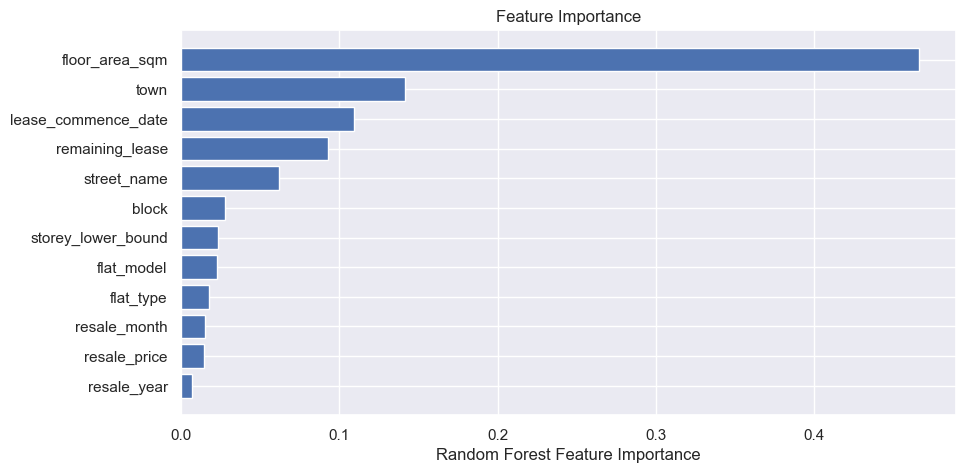

In [155]:
sorted_idx=rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx],rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

### Saving the model

In [156]:

model=rf_regressor.fit(x_train,y_train)

In [157]:
model

RandomForestRegressor(random_state=42)

In [158]:
import pickle

#save the model to disk 
filename='RandomForestRegressor_model.pkl'
with open(filename,'wb')as file:
    pickle.dump(model,file)

print(f"saved{filename} model to disk")

savedRandomForestRegressor_model.pkl model to disk


### Predicting

In [159]:
#get sample to predict the resale price 
pre_df=df1.sample(n=5)
pre_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
211557,15.0,3.0,33.0,242,65.0,14.0,1975,420000.0,52.166667,2022,3,1,3
69523,24.0,6.0,304.0,285,140.0,18.0,1998,518000.0,82.000000,2015,12,10,12
27720,13.0,3.0,524.0,191,82.0,15.0,1982,410000.0,68.000000,2013,6,7,9
24471,11.0,NaN,503.0,156,121.0,14.0,1987,542888.0,68.000000,2013,4,7,9
219323,2.0,3.0,128.0,19,82.0,15.0,1978,393000.0,54.833333,2022,7,7,9


In [160]:
#drop the resale price column
A=pre_df.drop('resale_price',axis=1)

In [161]:
A

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
211557,15.0,3.0,33.0,242,65.0,14.0,1975,52.166667,2022,3,1,3
69523,24.0,6.0,304.0,285,140.0,18.0,1998,82.000000,2015,12,10,12
27720,13.0,3.0,524.0,191,82.0,15.0,1982,68.000000,2013,6,7,9
24471,11.0,NaN,503.0,156,121.0,14.0,1987,68.000000,2013,4,7,9
219323,2.0,3.0,128.0,19,82.0,15.0,1978,54.833333,2022,7,7,9


#### Checking model by comparing resale_price

In [162]:
#make predictions on the sample
pre_pred=rf_regressor.predict(A)
pre_pred

array([396197.76, 525962.68, 408270.  , 542877.44, 395376.64])

In [164]:
df1.to_csv('encoded_dataset.csv', index=False)

In [128]:
df1.tail(100000)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
166851,19.0,6.0,863.0,324,146.0,21.0,1988,820000.0,66.583333,2020,8,10,12
166852,20.0,2.0,120.0,359,45.0,17.0,1968,218000.0,46.833333,2020,8,7,9
166853,20.0,2.0,58.0,355,43.0,17.0,1967,180000.0,45.916667,2020,8,10,12
166854,20.0,2.0,61.0,348,54.0,14.0,1967,190000.0,45.833333,2020,8,10,12
166855,20.0,2.0,52.0,351,43.0,17.0,1983,183888.0,61.833333,2020,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267044,22.0,6.0,652.0,410,166.0,18.0,1992,865000.0,67.250000,2024,4,7,9
267045,22.0,6.0,392.0,403,142.0,18.0,1988,780888.0,63.250000,2024,4,7,9
267046,22.0,6.0,324.0,405,146.0,18.0,1988,830000.0,63.333333,2024,4,4,6
267047,22.0,6.0,326.0,400,146.0,21.0,1988,865000.0,63.333333,2024,4,4,6
